# Global Terrorism Project Python Code

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2016.   
You can access and download the raw data here:  https://www.kaggle.com/START-UMD/gtd/data

In [117]:
import pandas as pd
from datetime import datetime
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [118]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# for figures to show up in the notebook:
init_notebook_mode(connected=True) 

In [119]:
np.random.seed(101)

In [120]:
# Set plotting styles:
sns.set_style('white')  

----
# Get the data

In [121]:
# Read in raw data and set as a data frame: df
df = pd.read_csv('global_terrorism_db_0617dist.csv', encoding="ISO-8859-1")

/Users/langwang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170351 entries, 0 to 170350
Columns: 135 entries, eventid to related
dtypes: float64(77), object(58)
memory usage: 175.5+ MB


In [123]:
df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN


----
# Data Cleaning

In [124]:
# list column names:
# list(df.columns)

In [125]:
# Subset the df with all the columns I want:
df = df[['iyear','imonth','iday', 'country','country_txt','region','region_txt','provstate','city',
          'latitude', 'longitude','success','suicide','attacktype1', 'attacktype1_txt','targtype1',
          'targtype1_txt','gname','weaptype1','weaptype1_txt','nkill','nwound']]

In [126]:
# df.info()

In [127]:
# Assert that there are no missing values for iyear column:
assert pd.notnull(df.iyear).all() 

In [128]:
# change the 'iyear' column's data type:
df['iyear'] = df['iyear'].astype(int)

In [129]:
# df['iyear'].head(2)

In [130]:
# imonth and iday columns each has only one missing value. I drop them.

# Remove rows in df where all of these two columns contain missing value:
df = df.dropna(subset=['imonth', 'iday'])

In [131]:
# convert data type:
df['imonth'] = df['imonth'].astype(int)

In [132]:
# convert data type:
df['iday'] = df['iday'].astype(int)

In [133]:
# check
# df.dtypes

In [134]:
# how many zeros?
# df['iday'].value_counts()

In [135]:
# how many zeros?
# df['imonth'].value_counts()

In [136]:
# replace zeros with a random number from 1 to 12:
df['imonth'].replace(to_replace=0, value=np.random.randint(1,13), inplace=True)

In [137]:
# check
# df['imonth'].value_counts()

In [138]:
# replace zeros with a random number from 1 to 28:
df['iday'].replace(to_replace=0, value=np.random.randint(1,29), inplace=True)

In [139]:
# check
# df['iday'].value_counts()

In [140]:
# Combine the first three columns as dateTime object
df['date']=df.apply(lambda x:datetime.strptime("{0} {1} {2}".format(x['iyear'],x['imonth'], x['iday']),"%Y %m %d"),axis=1)


In [141]:
# check  
# df.info()

In [142]:
# Convert data types for some columns from float to int:
float_list = ['country','region', 'success','suicide', 'attacktype1', 'targtype1', 'weaptype1']
for column_name in float_list:
    df[column_name] = df[column_name].astype(int)

In [143]:
# Check 'success' column:
df['success'].value_counts()

1    152701
0     17649
Name: success, dtype: int64

In [144]:
# Check 'suicide' column:
df['suicide'].value_counts()

0    164580
1      5770
Name: suicide, dtype: int64

In [145]:
# Convert 'success' and 'suicide' columns to categorical data type:
df['success'] = df['success'].astype('category')
df['suicide'] = df['suicide'].astype('category')

In [146]:
# Rename some columns:
df.rename(columns={'iyear':'year', 'imonth':'month', 'iday':'day', 'country':'country_id',
                    'region':'region_id', 'attacktype1':'attacktype_id', 'attacktype1_txt':'attacktype_txt',
                    'targtype1':'targtype_id', 'targtype1_txt':'targtype_txt', 'gname':'gang_name',
                    'weaptype1':'weaptype_id', 'weaptype1_txt':'weaptype_txt', 'nkill':'n_killed', 
                    'nwound':'n_wound'}, inplace=True) 

In [147]:
# drop duplicate data:
df = df.drop_duplicates()

In [148]:
# check the data frame again:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158284 entries, 0 to 170350
Data columns (total 23 columns):
year              158284 non-null int64
month             158284 non-null int64
day               158284 non-null int64
country_id        158284 non-null int64
country_txt       158284 non-null object
region_id         158284 non-null int64
region_txt        158284 non-null object
provstate         145548 non-null object
city              157849 non-null object
latitude          154251 non-null float64
longitude         154251 non-null float64
success           158284 non-null category
suicide           158284 non-null category
attacktype_id     158284 non-null int64
attacktype_txt    158284 non-null object
targtype_id       158284 non-null int64
targtype_txt      158284 non-null object
gang_name         158284 non-null object
weaptype_id       158284 non-null int64
weaptype_txt      158284 non-null object
n_killed          149761 non-null float64
n_wound           144339 non-

----
### Another crucial step during the data cleaning process is to check for outliers. 

In [149]:
# There are only two columns in the data frame that have numerical values: 'n_killed' and 'n_wound' columns
# df[['n_killed', 'n_wound']] 

In [150]:
# Does the n_killed column contain any negative values?  No.
any(df.n_killed < 0)

False

In [151]:
# Does the n_wound column contain any negative values?  No.
any(df.n_wound < 0)

False

In [152]:
# Does the n_killed column contain any missing values?  Yes.
pd.notnull(df.n_killed).all()

False

In [153]:
# Does the n_wound column contain any missing values?  Yes.
pd.notnull(df.n_wound).all()

False

In [154]:
# After considering my options, I decided to fill the NaN values in both columns with number 0.
df[['n_killed', 'n_wound']] = df[['n_killed', 'n_wound']].fillna(value=0)

In [155]:
# convert data type:
df[['n_killed', 'n_wound']] = df[['n_killed', 'n_wound']].astype(int)

In [156]:
# Check the data frame again:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158284 entries, 0 to 170350
Data columns (total 23 columns):
year              158284 non-null int64
month             158284 non-null int64
day               158284 non-null int64
country_id        158284 non-null int64
country_txt       158284 non-null object
region_id         158284 non-null int64
region_txt        158284 non-null object
provstate         145548 non-null object
city              157849 non-null object
latitude          154251 non-null float64
longitude         154251 non-null float64
success           158284 non-null category
suicide           158284 non-null category
attacktype_id     158284 non-null int64
attacktype_txt    158284 non-null object
targtype_id       158284 non-null int64
targtype_txt      158284 non-null object
gang_name         158284 non-null object
weaptype_id       158284 non-null int64
weaptype_txt      158284 non-null object
n_killed          158284 non-null int64
n_wound           158284 non-nu

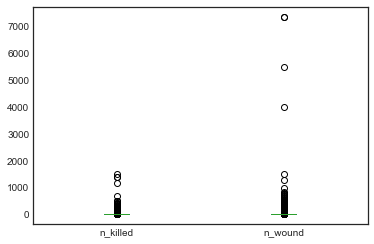

In [157]:
# visualize the outliers for the two columns:
df[['n_killed', 'n_wound']].plot.box()

In [158]:
# Looking for outliers:
df[['n_killed', 'n_wound']].describe()

,n_killed,n_wound
count,158284.00000,158284.000000
mean,2.39148,3.100010
std,11.39331,34.279828
min,0.00000,0.000000
25%,0.00000,0.000000
50%,0.00000,0.000000
75%,2.00000,2.000000
max,1500.00000,7366.000000


In [159]:
# Outlier definition:

# IQR = Q3 - Q1
# lower fence = Q1 - 1.5*IQR  
# higher fence = Q3 + 1.5*IQR 
# # any number outside the fences are considered outliers.

In [160]:
# make a function to detect outliers:

def removeOutliers(x, outlierConstant=1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR_15 = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR_15, upper_quartile + IQR_15)
    outlierList = []
    for y in a.tolist():
        if y < quartileSet[0] or y > quartileSet[1]:
            outlierList.append(y)
    print(outlierList)

In [161]:
# Call the function:
# removeOutliers(df.n_killed)

# Output: get a HUGE list of outliers!! 

In [162]:
# Re-checking my computation for outliers in the n_killed column:
upper_quartile = np.percentile(df.n_killed, 75)
lower_quartile = np.percentile(df.n_killed, 25)
IQR_15 = (upper_quartile - lower_quartile) * 1.5
quartileSet = (lower_quartile - IQR_15, upper_quartile + IQR_15)
quartileSet

(-3.0, 5.0)

In [163]:
# No wonder I get a HUGE list. Any number greater than 5 is considered an outlier if we use 
# the IQR method to detect outliers. Obviously, this is not practical for this problem.
# Therefore, I have to make a judgement call myself. 

# After examing the boxplot above, I decide to set numbers greater than 1000 as outliers.

In [164]:
# show dataframe where more than 1,000 people killed:
df[df.n_killed>1000]
# 4 rows in total.

,year,month,day,country_id,country_txt,region_id,region_txt,provstate,city,latitude,...,attacktype_id,attacktype_txt,targtype_id,targtype_txt,gang_name,weaptype_id,weaptype_txt,n_killed,n_wound,date
55860,1994,4,13,168,Rwanda,11,Sub-Saharan Africa,Kigali,Gikoro,-1.932787,...,2,Armed Assault,14,Private Citizens & Property,Hutu extremists,5,Firearms,1180,0,1994-04-13
73054,2001,9,11,217,United States,1,North America,New York,New York City,40.712784,...,4,Hijacking,14,Private Citizens & Property,Al-Qaida,10,Vehicle (not to include vehicle-borne explosiv...,1383,7366,2001-09-11
73055,2001,9,11,217,United States,1,North America,New York,New York City,40.712784,...,4,Hijacking,14,Private Citizens & Property,Al-Qaida,10,Vehicle (not to include vehicle-borne explosiv...,1382,7365,2001-09-11
133317,2014,6,12,95,Iraq,10,Middle East & North Africa,Saladin,Tikrit,34.596934,...,6,Hostage Taking (Kidnapping),4,Military,Islamic State of Iraq and the Levant (ISIL),5,Firearms,1500,0,2014-06-12


In [165]:
# show dataframe where more than 1,000 people wounded:
df[df.n_wound>1000]
# 7 rows in total.

,year,month,day,country_id,country_txt,region_id,region_txt,provstate,city,latitude,...,attacktype_id,attacktype_txt,targtype_id,targtype_txt,gang_name,weaptype_id,weaptype_txt,n_killed,n_wound,date
58770,1995,3,20,101,Japan,4,East Asia,NaN,Tokyo,35.685826,...,8,Unarmed Assault,19,Transportation,Aum Shinri Kyo,2,Chemical,13,5500,1995-03-20
61476,1996,1,31,186,Sri Lanka,6,South Asia,Western,Colombo,6.927079,...,3,Bombing/Explosion,1,Business,Liberation Tigers of Tamil Eelam (LTTE),6,Explosives/Bombs/Dynamite,90,1272,1996-01-31
67999,1998,8,7,104,Kenya,11,Sub-Saharan Africa,Nairobi,Nairobi,-1.285180,...,3,Bombing/Explosion,7,Government (Diplomatic),Al-Qaida,6,Explosives/Bombs/Dynamite,224,4000,1998-08-07
73054,2001,9,11,217,United States,1,North America,New York,New York City,40.712784,...,4,Hijacking,14,Private Citizens & Property,Al-Qaida,10,Vehicle (not to include vehicle-borne explosiv...,1383,7366,2001-09-11
73055,2001,9,11,217,United States,1,North America,New York,New York City,40.712784,...,4,Hijacking,14,Private Citizens & Property,Al-Qaida,10,Vehicle (not to include vehicle-borne explosiv...,1382,7365,2001-09-11
85571,2008,2,2,42,Chad,11,Sub-Saharan Africa,N'Djamena,N'Djamena,12.120819,...,2,Armed Assault,2,Government (General),Rebels,5,Firearms,160,1001,2008-02-02
159419,2016,3,9,95,Iraq,10,Middle East & North Africa,Kirkuk,Taza Khurmatu,35.299516,...,3,Bombing/Explosion,14,Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),2,Chemical,3,1500,2016-03-09


In [166]:
# Create a new dataframe without outliers from these two columns:  df_noout

condition1 = df['n_killed']<=1000
condition2 = df['n_wound']<=1000
df_noout = df[condition1 & condition2]

In [167]:
# Check:
# df_noout.info()

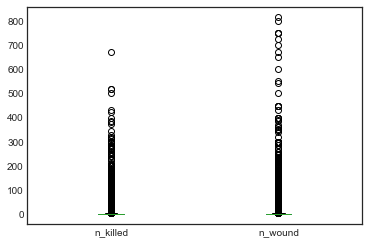

In [168]:
# Do boxplot again with the new data frame df_noout:
df_noout[['n_killed', 'n_wound']].plot.box()

----
# Exploratory Data Analysis

Is there a trend in numbers of terrorist attacks over the years?

Text(0,0.5,'Count')

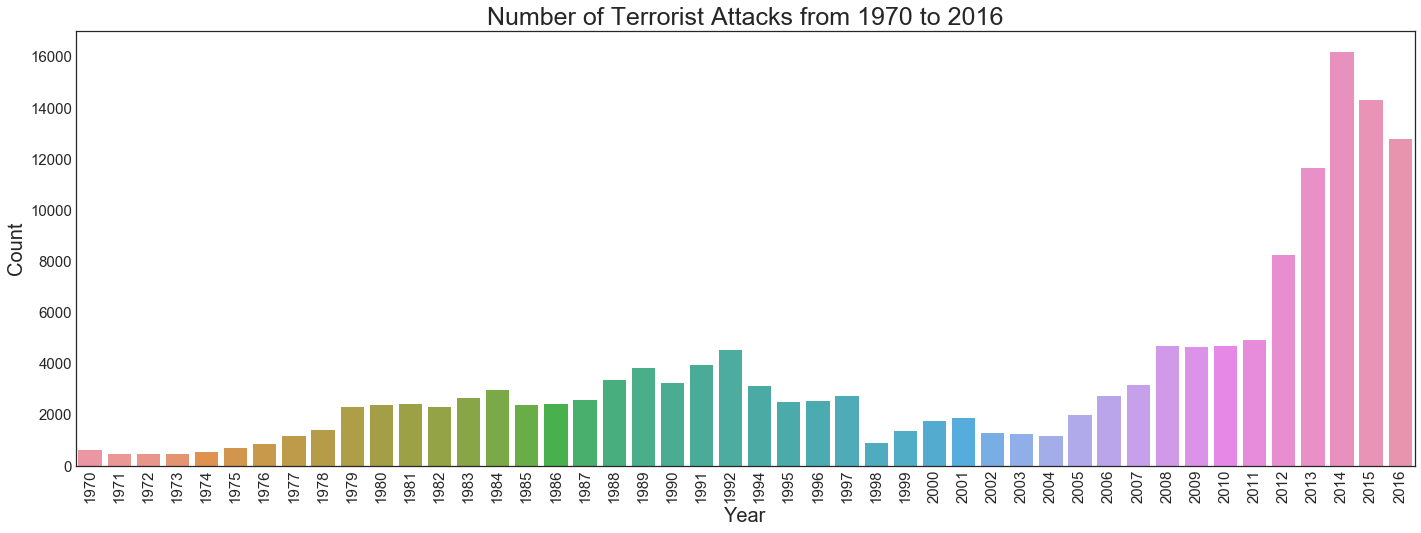

In [169]:
# Number of Terrorist Attacks from 1970 to 2016:
plt.figure(figsize=(24, 8))
sns.countplot('year', data=df)
plt.title('Number of Terrorist Attacks from 1970 to 2016', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Count', fontsize=20)

----
How about number of people killed? Is there a trend?

Text(0,0.5,'Count')

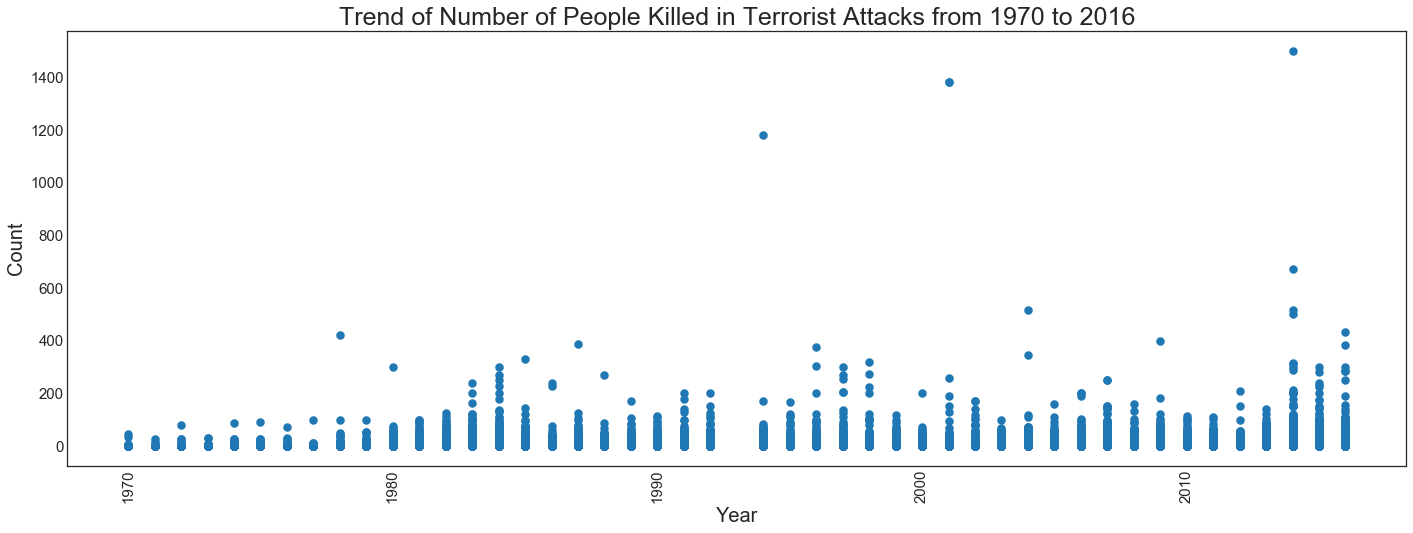

In [170]:
# Trend of Number of People Killed in Terrorist Attacks from 1970 to 2016   
df.plot.scatter(x='year', y='n_killed', figsize=(24, 8), lw=4)
plt.title('Trend of Number of People Killed in Terrorist Attacks from 1970 to 2016', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Count', fontsize=20)

----
How about number of people wounded? Is there a trend?

Text(0,0.5,'Count')

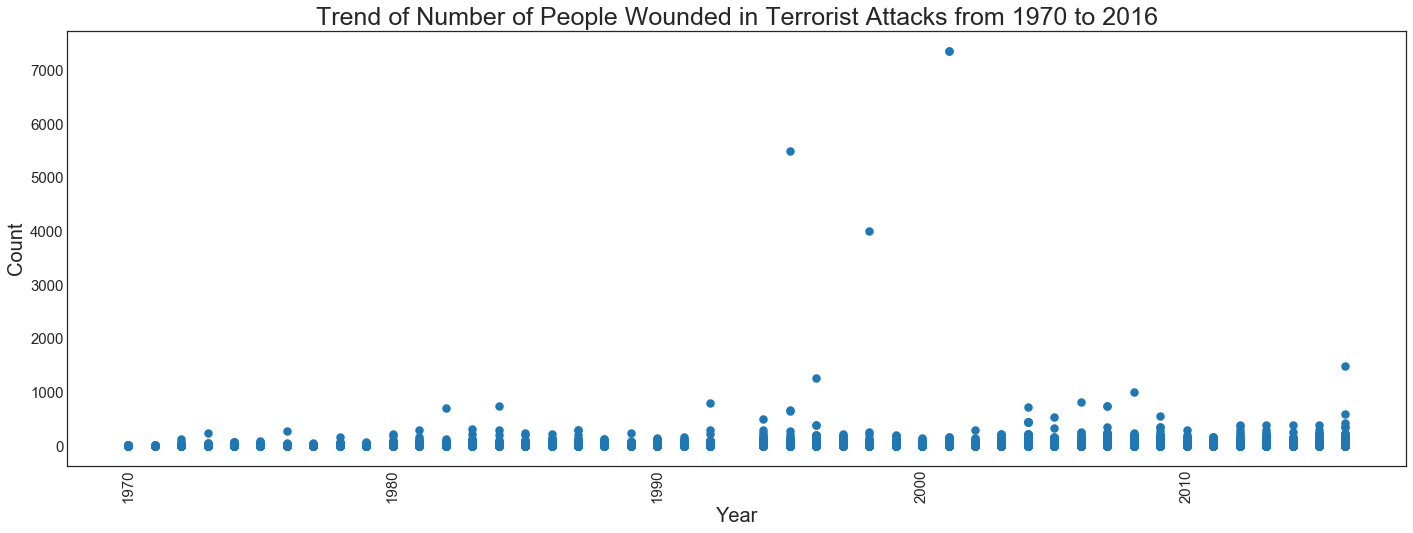

In [171]:
# Trend of Number of People Wounded in Terrorist Attacks from 1970 to 2016   
df.plot.scatter(x='year', y='n_wound', figsize=(24, 8), lw=4)
plt.title('Trend of Number of People Wounded in Terrorist Attacks from 1970 to 2016', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Count', fontsize=20)

----
Overlay the two graphs together:

Text(0,0.5,'Count')

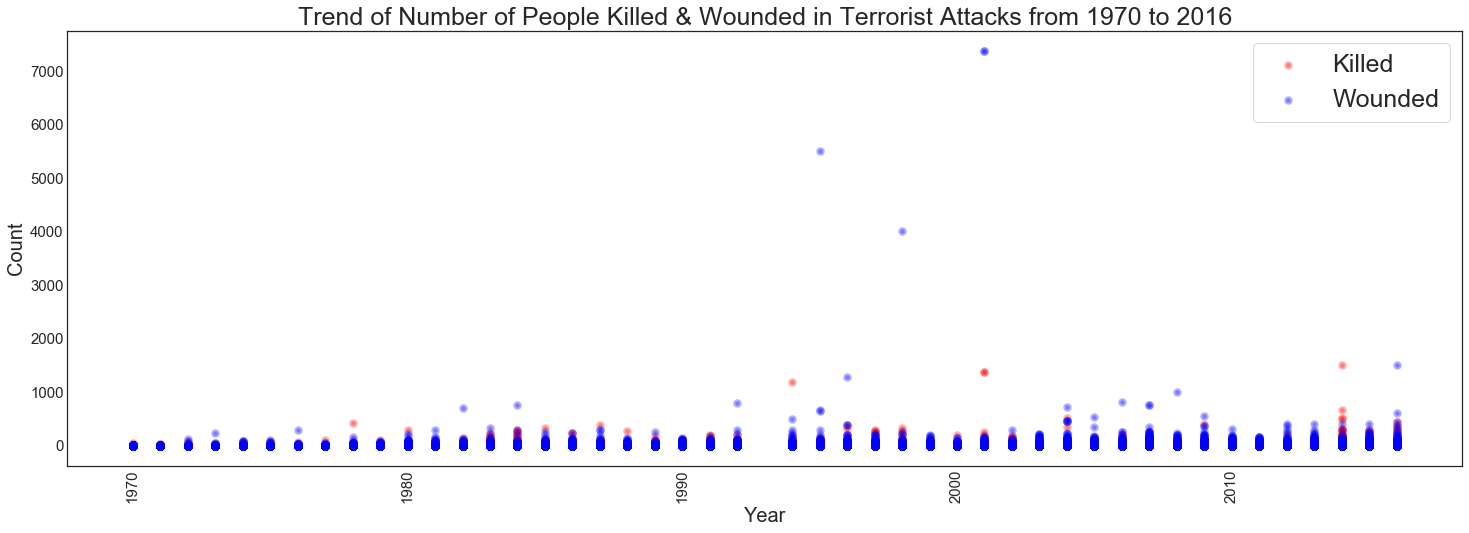

In [172]:
# Trend of Number of People Killed & Wounded in Terrorist Attacks from 1970 to 2016: 
fig, ax = plt.subplots(figsize=(25, 8))
df.plot.scatter(x='year', y='n_killed', ax=ax, color='r', lw=4, alpha = 0.3, label='Killed')
df.plot.scatter(x='year', y='n_wound', ax=ax, color='b', lw=4, alpha = 0.3, label='Wounded')
plt.legend(loc='best', frameon=True, fontsize=25)
plt.title('Trend of Number of People Killed & Wounded in Terrorist Attacks from 1970 to 2016', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Count', fontsize=20)

Limit y-axis to (0, 800):

Text(0,0.5,'Count')

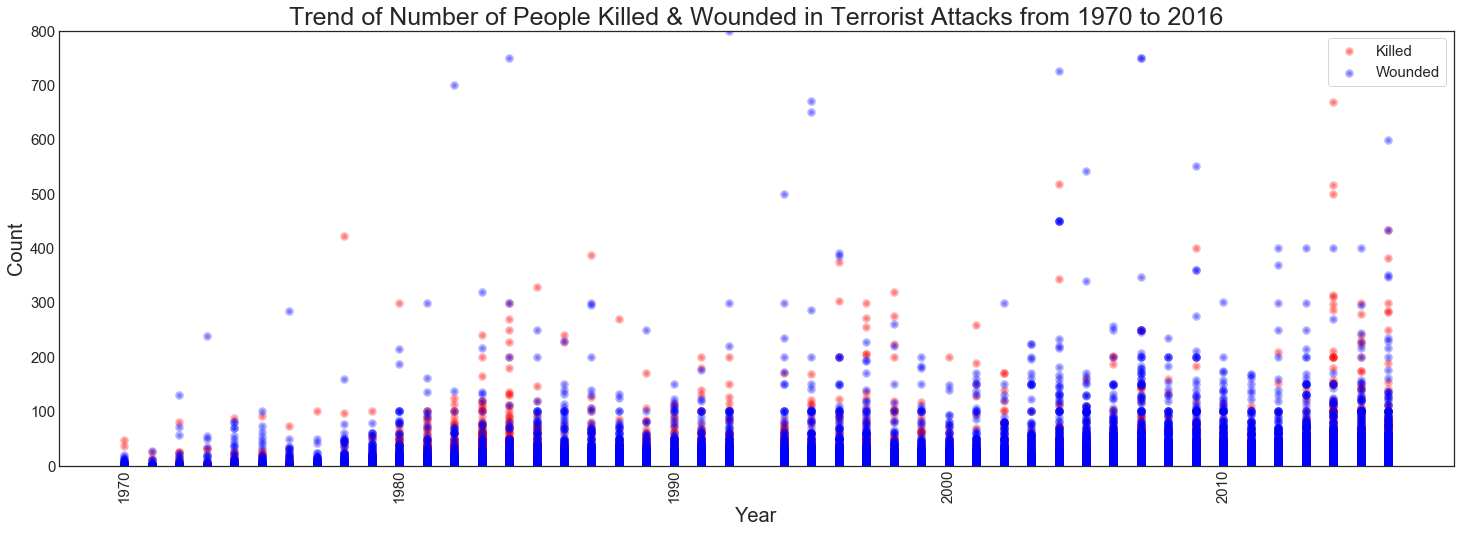

In [173]:
fig, ax = plt.subplots(figsize=(25, 8))
df.plot.scatter(x='year', y='n_killed', ax=ax, ylim=(0,800), color='r', lw=4, alpha = 0.3, label='Killed')
df.plot.scatter(x='year', y='n_wound', ax=ax, ylim=(0,800), color='b', lw=4, alpha = 0.3, label='Wounded')
plt.legend(loc='best', frameon=True, fontsize=15)
plt.title('Trend of Number of People Killed & Wounded in Terrorist Attacks from 1970 to 2016', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Count', fontsize=20)

----
Which regions have the highest number of terrorist attacks?

Text(0,0.5,'Count')

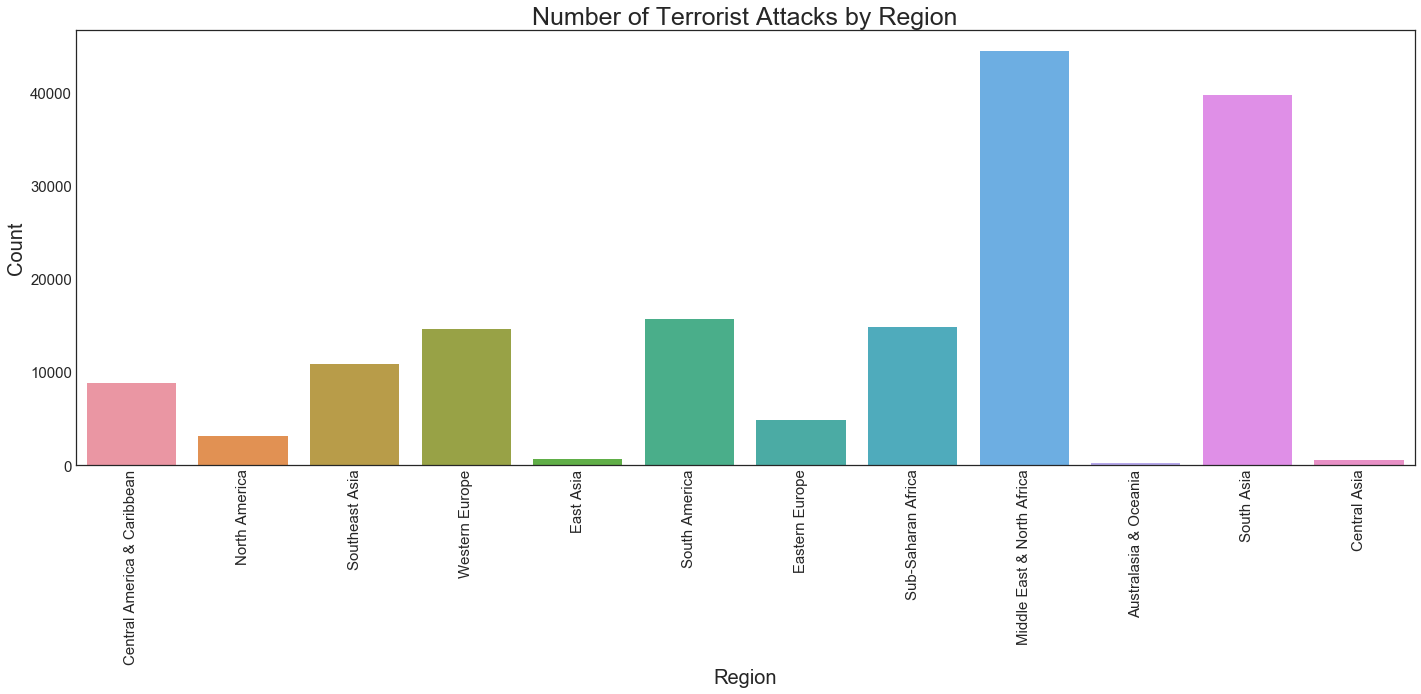

In [174]:
# Number of Terrorist Attacks by Region:
plt.figure(figsize=(24, 8))
sns.countplot('region_txt', data=df)
plt.title('Number of Terrorist Attacks by Region', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Region', fontsize=20) 
plt.ylabel('Count', fontsize=20)

----
Time trend for regions:

In [175]:
# Make a frequency table of year and region:
df_region = pd.crosstab(index=df.year, columns=df.region_txt)  
# df_region

Text(0,0.5,'Count')

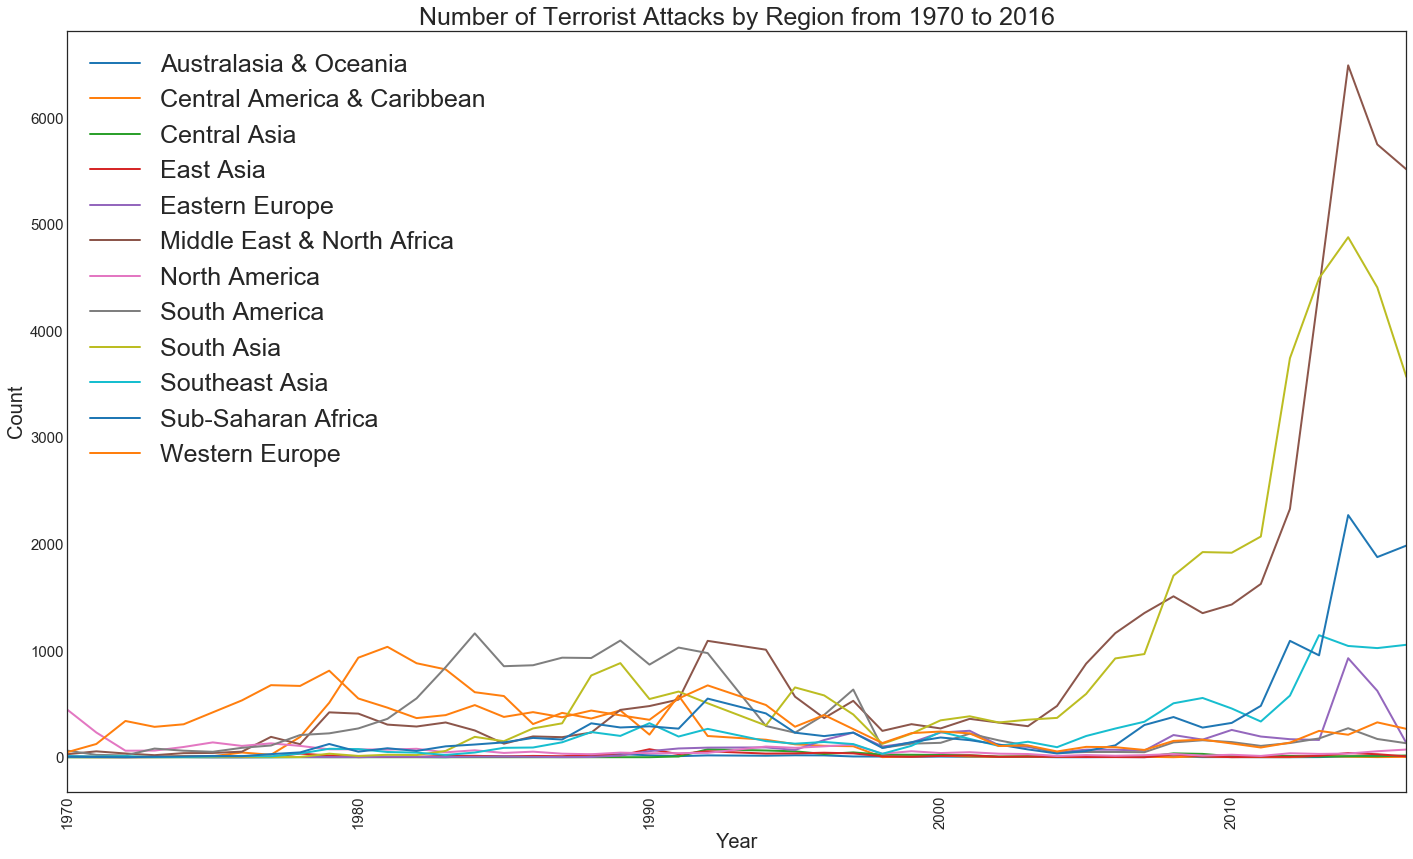

In [178]:
# Number of Terrorist Attacks by Region from 1970 to 2016:
df_region.plot(figsize=(24, 14), lw=2)
plt.legend(fontsize=25)
plt.title('Number of Terrorist Attacks by Region from 1970 to 2016', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

----
Attack types v.s regions:

In [177]:
# Make a frequency table of region and attack types:
df_region_attack = pd.crosstab(index=df.region_txt, columns=df.attacktype_txt)  
df_region_attack

attacktype_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
region_txt,,,,,,,,,
Australasia & Oceania,49,30,73,66,3,5,11,8,14
Central America & Caribbean,4171,1189,2128,328,26,137,483,16,294
Central Asia,114,114,218,18,8,2,45,4,16
East Asia,100,54,254,170,18,3,14,35,23
Eastern Europe,1193,385,2625,227,26,20,216,56,109
Middle East & North Africa,8564,4004,26755,873,126,86,2354,164,1509
North America,381,236,1389,823,18,63,112,69,30
South America,3480,2538,6698,649,63,206,1320,36,681
South Asia,10145,3757,19189,1618,82,100,2935,213,1635


Text(0.5,55.5,'Region')

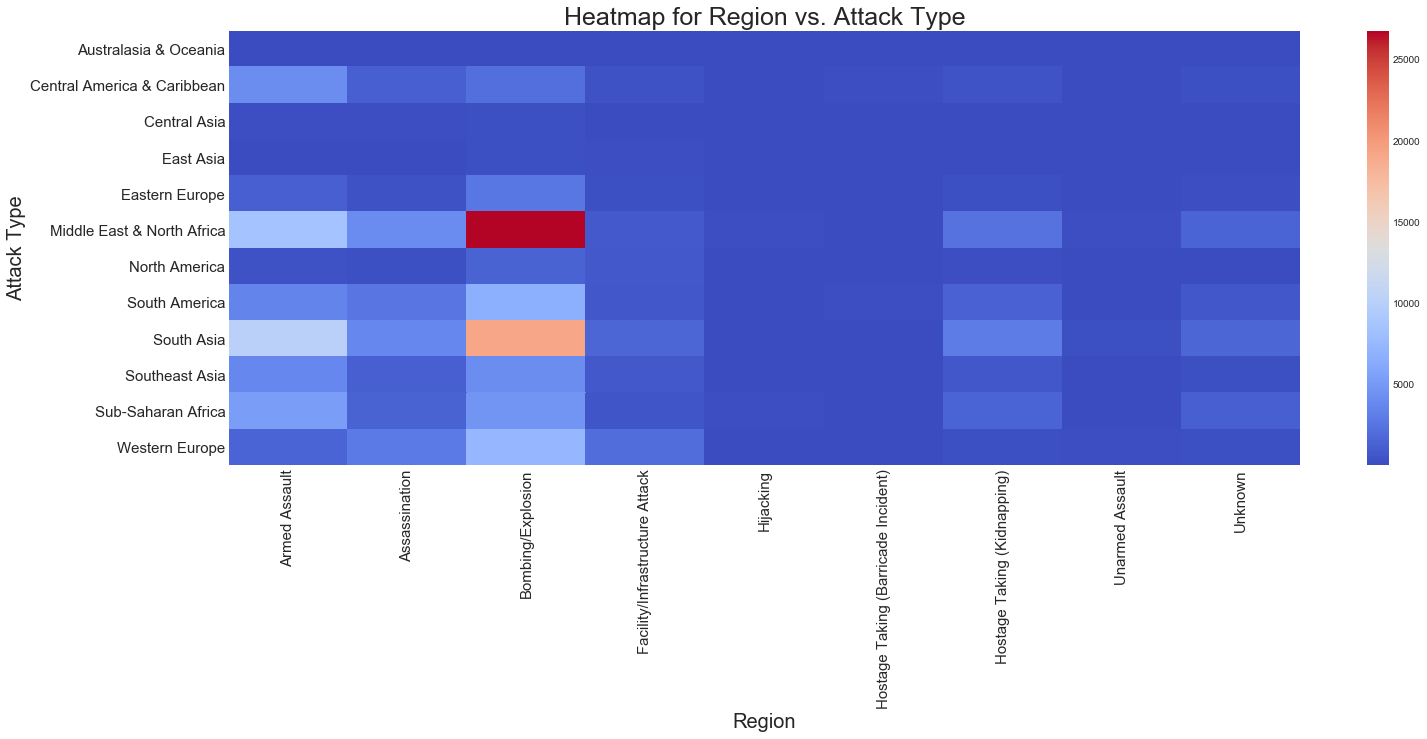

In [69]:
# Heatmap for Region vs. Attack Type:
plt.figure(figsize=(24, 8))
sns.heatmap(df_region_attack, cmap="coolwarm" )
plt.title('Heatmap for Region vs. Attack Type', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Attack Type', fontsize=20)
plt.xlabel('Region', fontsize=20)

Bombing/explosion are prevalent in the Middle East & North Africa and South Asia regions.

----

Number of attacks by attack type:

Text(0,0.5,'Count')

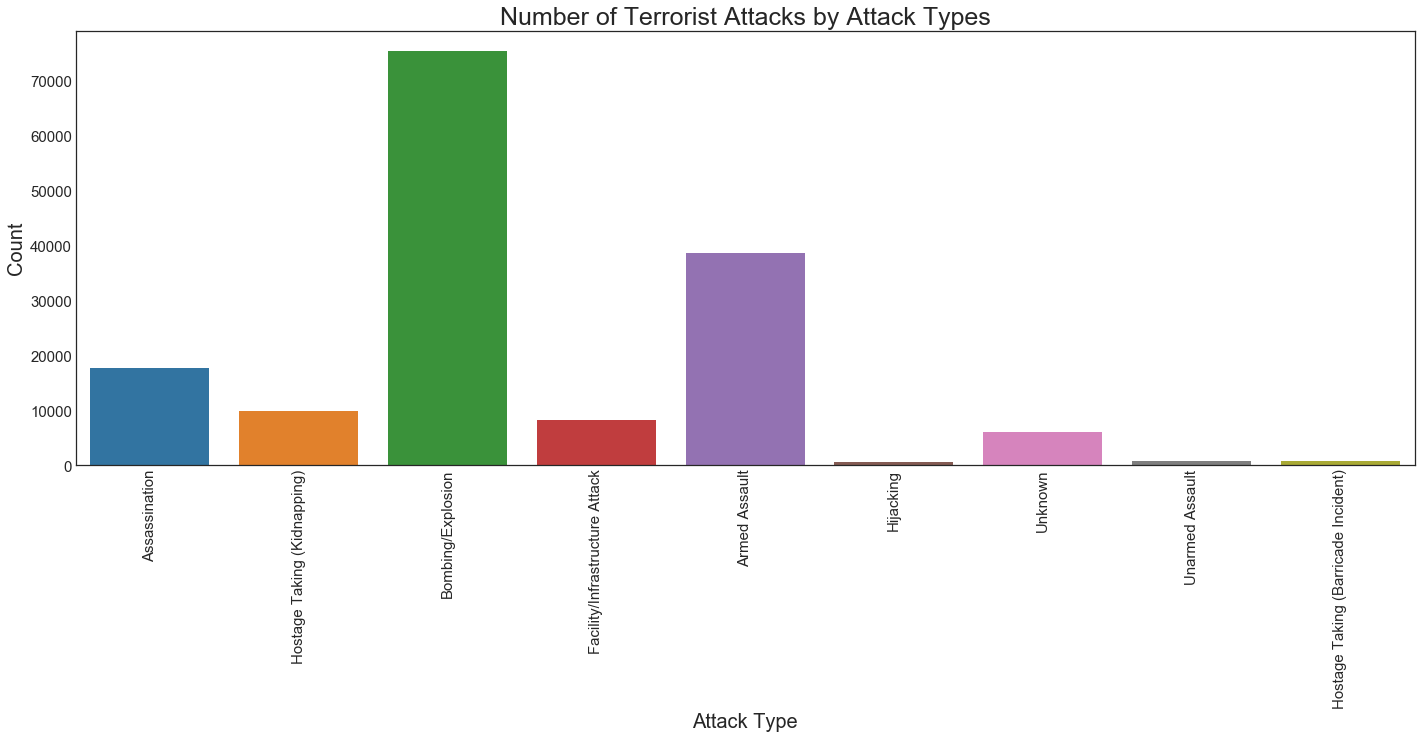

In [70]:
# Number of Terrorist Attacks by Attack Types:
plt.figure(figsize=(24, 8))
sns.countplot('attacktype_txt', data=df)
plt.title('Number of Terrorist Attacks by Attack Types', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Attack Type', fontsize=20) 
plt.ylabel('Count', fontsize=20)

----
Which attack type is most lethal (kill and wound most people)?

In [71]:
# Get data into the right shape:
df_attacktype = df_noout.groupby('attacktype_txt')[['n_killed', 'n_wound']].sum()
df_attacktype.reset_index(inplace=True)
df_attacktype

,attacktype_txt,n_killed,n_wound
0,Armed Assault,149879,70210
1,Assassination,23377,13058
2,Bombing/Explosion,143400,345265
3,Facility/Infrastructure Attack,3410,3541
4,Hijacking,920,589
5,Hostage Taking (Barricade Incident),3534,3595
6,Hostage Taking (Kidnapping),19443,5904
7,Unarmed Assault,775,7582
8,Unknown,27860,12934


Text(0,0.5,'Count')

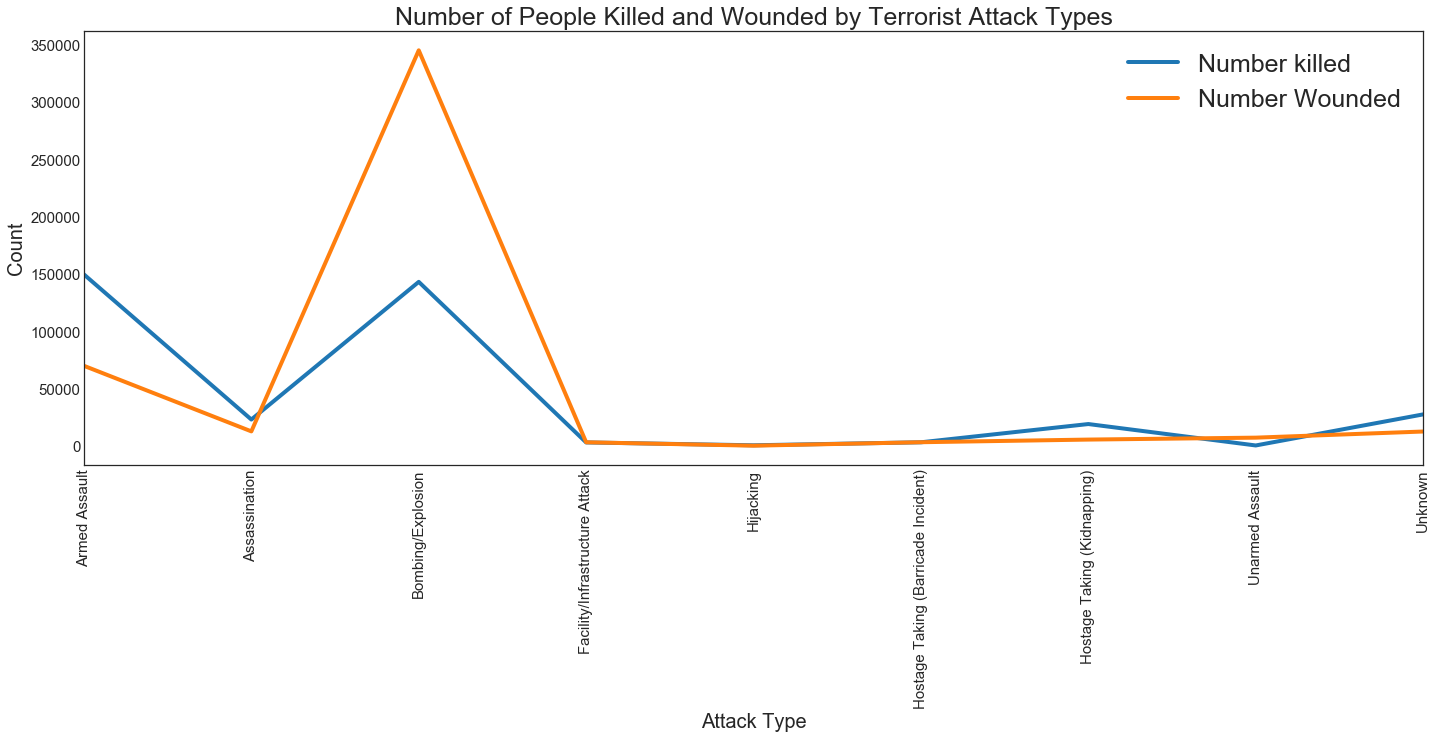

In [72]:
# Number of People Killed and Wounded by Terrorist Attack Types: 
df_attacktype.plot(x='attacktype_txt', y=['n_killed', 'n_wound'], figsize=(24, 8), lw=4)
plt.legend(['Number killed', 'Number Wounded'] , fontsize=25)
plt.title('Number of People Killed and Wounded by Terrorist Attack Types', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Attack Type', fontsize=20)
plt.ylabel('Count', fontsize=20)

----
Overlay the two graphs:

Text(0,0.5,'Count')

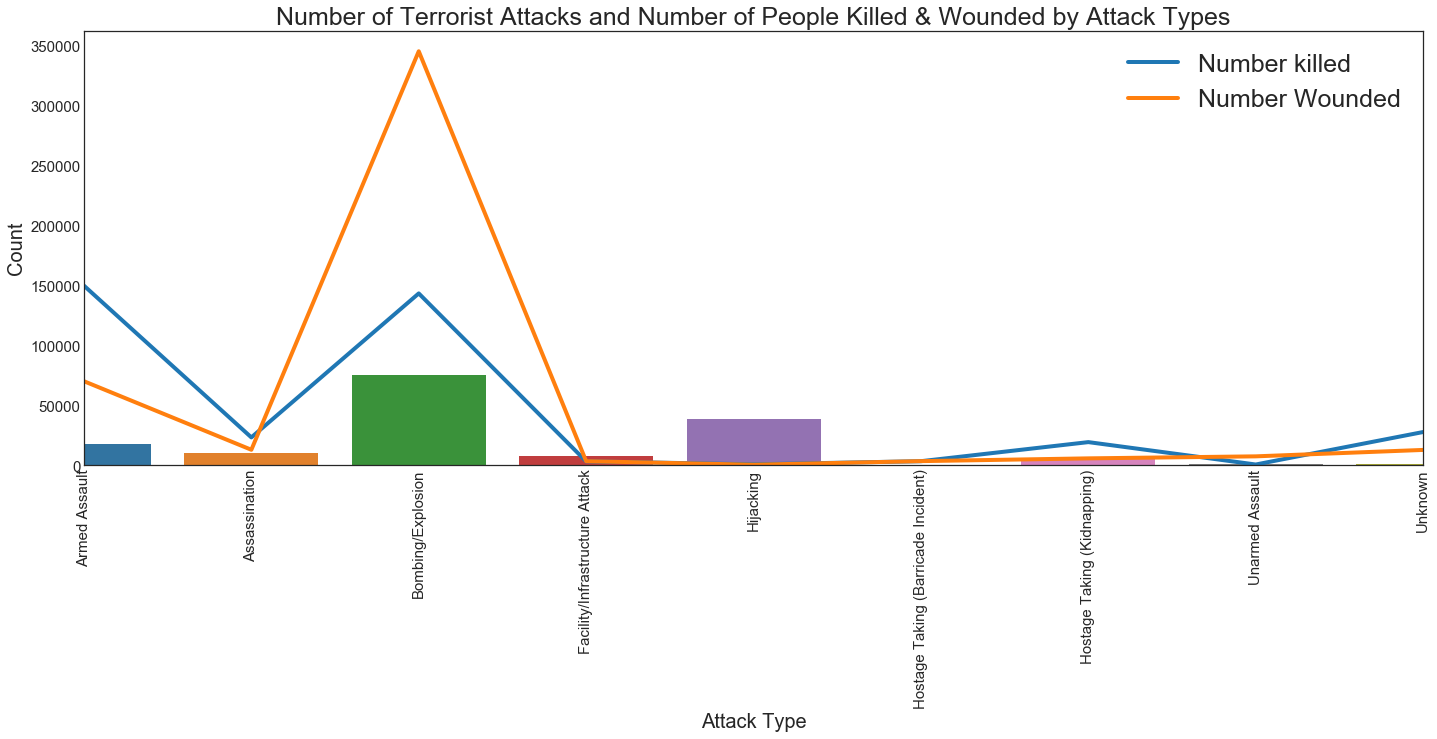

In [215]:
# Number of Terrorist Attacks and Number of People Killed and Wounded by Attack Types:
fig, ax = plt.subplots()
sns.countplot('attacktype_txt', data=df, ax=ax)
df_attacktype.plot(x='attacktype_txt', y=['n_killed', 'n_wound'], figsize=(24, 8), lw=4, ax=ax)
plt.legend(['Number killed', 'Number Wounded'] , fontsize=25)
plt.title('Number of Terrorist Attacks and Number of People Killed & Wounded by Attack Types', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Attack Type', fontsize=20)
plt.ylabel('Count', fontsize=20)

----
### Hypothesis Test on Correlation

How strong is the correlation between n_killed and n_wound for each attack type? 

In [179]:
# 1. Setup an appropriate hypothesis test:
# Ho: Under different attack types, number of people killed and number of people wounded are independent of each other.
# Ha: Under different attack types, number of people killed and number of people wounded are not independent of each other.

# 2. Compute and report the observed significance value (or p-value):
corr_coef, corr_p = stats.pearsonr(df_attacktype['n_killed'], df_attacktype['n_wound'])

print("r={} and p-value={}".format(corr_coef, corr_p))


r=0.7667469933395362 and p-value=0.01592616995119871


In [180]:
# Since p-value is < 0.05, we reject the null hypothesis and conclude that 
# Under different attack types, number of people killed and number of people 
# wounded are not independent of each other.

# Since the Pearson-correlation statistics r = 0.7667, we can conclude that there is 
# a strong positive correlation between number of people killed and number of people wounded.


Text(32.625,0.5,'Number of People Wounded')

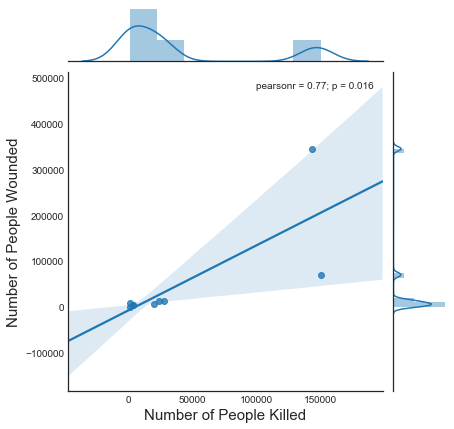

In [181]:
# Show a correlation plot:

sns.jointplot('n_killed', 'n_wound', data=df_attacktype, kind='reg')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of People Killed', fontsize=15)
plt.ylabel('Number of People Wounded', fontsize=15)


----
### ANOVA Test

ANOVA Test - compare means of number of people killed for each attack type

In [182]:
df_noout.head(2)

,year,month,day,country_id,country_txt,region_id,region_txt,provstate,city,latitude,...,attacktype_id,attacktype_txt,targtype_id,targtype_txt,gang_name,weaptype_id,weaptype_txt,n_killed,n_wound,date
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,...,1,Assassination,14,Private Citizens & Property,MANO-D,13,Unknown,1,0,1970-07-02
1,1970,12,18,130,Mexico,1,North America,NaN,Mexico city,19.432608,...,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,13,Unknown,0,0,1970-12-18


In [183]:
# Get data into the right shape:
df_anova= df_noout.pivot_table(index='date', columns='attacktype_txt', values='n_killed', aggfunc=np.sum)
del df_anova['Unknown']
df_anova.head()

attacktype_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault
date,,,,,,,,
1970-01-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1970-01-02,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1970-01-03,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1970-01-06,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1970-01-08,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [184]:
# df_anova.info()

In [185]:
list(df_anova.columns)

['Armed Assault',
 'Assassination',
 'Bombing/Explosion',
 'Facility/Infrastructure Attack',
 'Hijacking',
 'Hostage Taking (Barricade Incident)',
 'Hostage Taking (Kidnapping)',
 'Unarmed Assault']

In [186]:
# delete NaN values from each individual column: (get the columns ready to be the arguments for the ANOVA test function)
Armed_Assault = df_anova['Armed Assault'].dropna()
Assassination = df_anova['Assassination'].dropna()
Bombing_Explosion = df_anova['Bombing/Explosion'].dropna()
Facility_Infrastructure_Attack = df_anova['Facility/Infrastructure Attack'].dropna()
Hijacking = df_anova['Hijacking'].dropna()
Hostage_Taking_Barricade_Incident = df_anova['Hostage Taking (Barricade Incident)'].dropna()
Hostage_Taking_Kidnapping = df_anova['Hostage Taking (Kidnapping)'].dropna()
Unarmed_Assault = df_anova['Unarmed Assault'].dropna()

In [187]:
# one-way ANOVA test:

# H0: all the means of number of people killed for each attack type are equal.
# Ha: not all the means of number of people killed for each attack type are equal.

F, p = stats.f_oneway(Armed_Assault, Assassination, Bombing_Explosion, Facility_Infrastructure_Attack, Hijacking,  
                      Hostage_Taking_Barricade_Incident, Hostage_Taking_Kidnapping, Unarmed_Assault )  

print("F={} and p-value={}".format(F, p))


F=416.7607007013634 and p-value=0.0


In [188]:
# Since the p-value is zero, we reject the null and conclude 
# that not all the means of each attack type are equal.


----
### Post Hoc Analysis - Tukey's Range Test

Tukey's Range Test - do pairwise comparison on the means

In [189]:
# post hoc analysis - Tukey's range test:

# Tukey's range test, named after the American mathematician John Tukey, 
# is a common method used as post hoc analysis after one-way ANOVA. 
# This test compares all possible pairs and we can use it to precisely identify 
# difference between two means that's greater than the expected standard error.


In [190]:
# Get the data frame into the right shape:
df_tukey = df_noout[['attacktype_txt', 'n_killed']].sort_values(by=['attacktype_txt']) 
df_tukey = df_tukey[df_tukey['attacktype_txt'] != 'Unknown']
df_tukey.head()

,attacktype_txt,n_killed
170350,Armed Assault,0
92831,Armed Assault,1
92825,Armed Assault,1
33333,Armed Assault,8
92819,Armed Assault,0


In [191]:
# Tukey's range test:

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
 
mc = MultiComparison(df_tukey['n_killed'], df_tukey['attacktype_txt'])
result = mc.tukeyhsd()
 
print(result)


                           Multiple Comparison of Means - Tukey HSD,FWER=0.05                          
               group1                              group2               meandiff  lower   upper  reject
-------------------------------------------------------------------------------------------------------
           Armed Assault                       Assassination             -2.563  -2.8046 -2.3214  True 
           Armed Assault                     Bombing/Explosion          -1.9753  -2.1421 -1.8085  True 
           Armed Assault               Facility/Infrastructure Attack   -3.4607  -3.7851 -3.1363  True 
           Armed Assault                         Hijacking              -2.3124  -3.4205 -1.2044  True 
           Armed Assault            Hostage Taking (Barricade Incident)  0.3962  -0.5409  1.3334 False 
           Armed Assault                Hostage Taking (Kidnapping)     -1.9285  -2.2279  -1.629  True 
           Armed Assault                      Unarmed Assault   

----
Visualize what we just did with a bar graph

In [192]:
# Get the data into the right shape:   
df_graph = df_tukey.groupby('attacktype_txt')[['n_killed']].mean()
df_graph.reset_index(inplace=True)
df_graph

,attacktype_txt,n_killed
0,Armed Assault,3.877050
1,Assassination,1.314053
2,Bombing/Explosion,1.901756
3,Facility/Infrastructure Attack,0.416361
4,Hijacking,1.564626
5,Hostage Taking (Barricade Incident),4.273277
6,Hostage Taking (Kidnapping),1.948587
7,Unarmed Assault,0.948592


Text(0,0.5,'Average Number of People Killed per Incident')

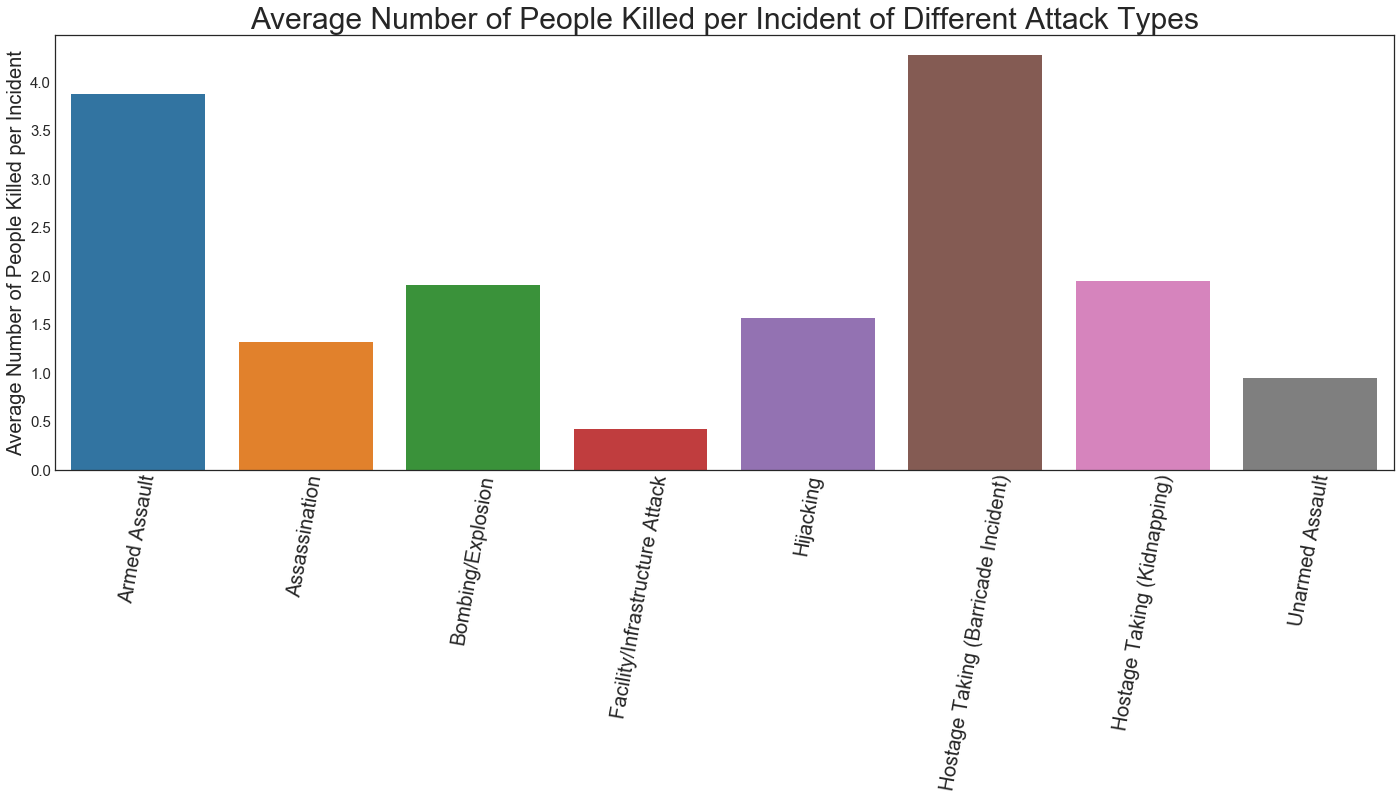

In [193]:
# Average Number of People Killed per Incident of Different Attack Types
plt.figure(figsize=(24, 8))
sns.barplot(x='attacktype_txt', y='n_killed', data=df_graph)
plt.title('Average Number of People Killed per Incident of Different Attack Types', fontsize=30)
plt.xticks(rotation=80, fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Average Number of People Killed per Incident', fontsize=20)


----
Which target group is most vulnerable during terrorist attacks?

Text(0,0.5,'Count')

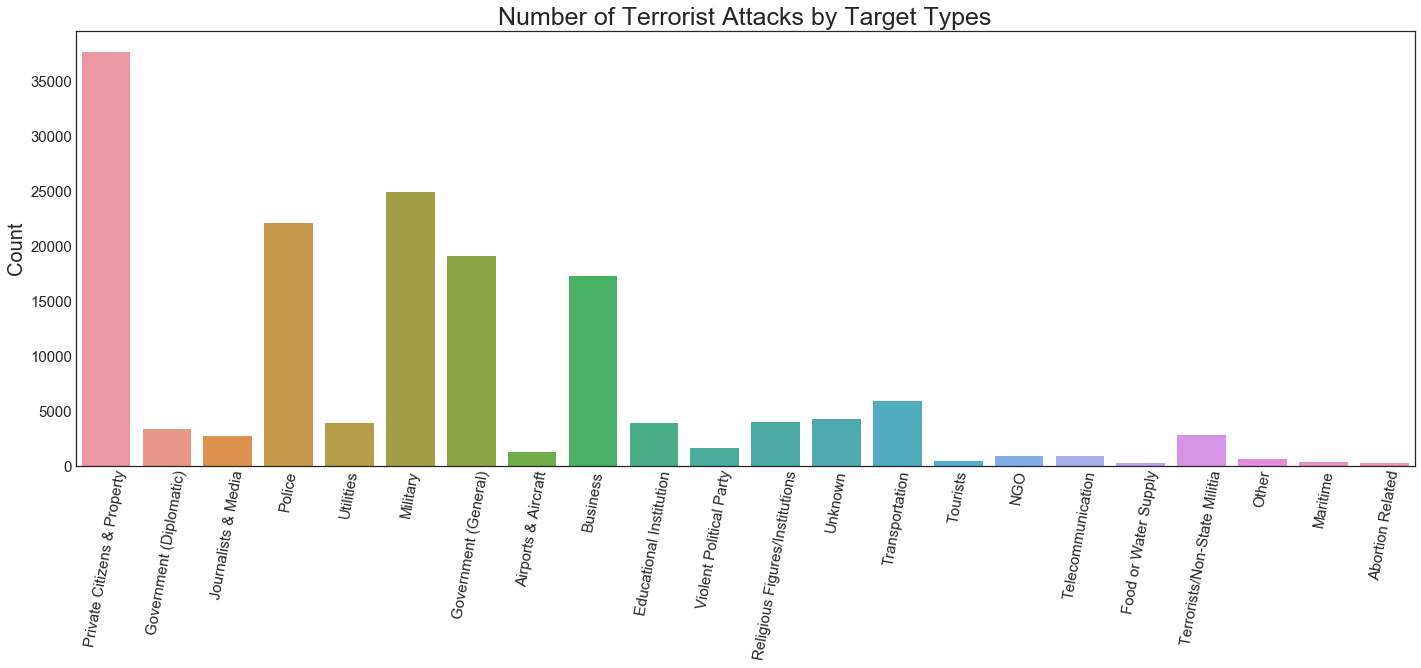

In [194]:
# Number of Terrorist Attacks by Target Types:
plt.figure(figsize=(24, 8))
sns.countplot('targtype_txt', data=df)
plt.title('Number of Terrorist Attacks by Target Types', fontsize=25)
plt.xticks(rotation=80, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('', fontsize=20) 
plt.ylabel('Count', fontsize=20)

----
### In the United States:

In [195]:
# subset the data frame to U.S. data only:
df_usa = df[df.country_txt == 'United States']

In [196]:
# check the head of data frame:
df_usa.head(2)

,year,month,day,country_id,country_txt,region_id,region_txt,provstate,city,latitude,...,attacktype_id,attacktype_txt,targtype_id,targtype_txt,gang_name,weaptype_id,weaptype_txt,n_killed,n_wound,date
5,1970,1,1,217,United States,1,North America,Illinois,Cairo,37.005105,...,2,Armed Assault,3,Police,Black Nationalists,5,Firearms,0,0,1970-01-01
7,1970,1,2,217,United States,1,North America,California,Oakland,37.805065,...,3,Bombing/Explosion,21,Utilities,Unknown,6,Explosives/Bombs/Dynamite,0,0,1970-01-02


In [197]:
# df_usa.info()

In [198]:
df_usa.describe()

,year,month,day,country_id,region_id,latitude,longitude,attacktype_id,targtype_id,weaptype_id,n_killed,n_wound
count,2588.000000,2588.000000,2588.000000,2588.0,2588.0,2587.000000,2587.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000
mean,1983.419629,6.232998,15.461747,217.0,1.0,36.760864,-92.351758,4.241499,6.283617,6.617079,1.408423,6.987635
std,13.510898,3.383976,8.978762,0.0,0.0,7.293351,21.995961,2.123011,5.687447,1.618831,38.765744,205.708511
min,1970.000000,1.000000,1.000000,217.0,1.0,17.966072,-157.858333,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1971.000000,3.000000,7.000000,217.0,1.0,34.053490,-118.126287,3.000000,1.000000,6.000000,0.000000,0.000000
50%,1979.000000,6.000000,16.000000,217.0,1.0,38.890370,-85.766404,3.000000,4.000000,6.000000,0.000000,0.000000
75%,1994.000000,9.000000,23.000000,217.0,1.0,40.783060,-74.005941,7.000000,10.000000,8.000000,0.000000,0.000000
max,2016.000000,12.000000,31.000000,217.0,1.0,64.837778,105.270546,9.000000,22.000000,13.000000,1383.000000,7366.000000


In [199]:
# df_usa.provstate.value_counts()

In [200]:
# Group the U.S data by state:
state_count = df_usa.groupby('provstate').count()[['date']]
state_count = state_count.reset_index()
state_count.columns = ['state_name', 'num_of_attacks']
state_count.head()

,state_name,num_of_attacks
0,Alabama,15
1,Alaska,1
2,Arizona,31
3,Arkansas,5
4,California,568


In [201]:
# Found this state code v.s state name dictionary from the internet:
state_dict = {"AL": "Alabama",
    "AK": "Alaska",
    "AS": "American Samoa",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "DC": "District Of Columbia",
    "FM": "Federated States Of Micronesia",
    "FL": "Florida",
    "GA": "Georgia",
    "GU": "Guam",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MH": "Marshall Islands",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "MP": "Northern Mariana Islands",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PW": "Palau",
    "PA": "Pennsylvania",
    "PR": "Puerto Rico",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VI": "Virgin Islands",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming"}


In [202]:
# reverse the dictionary:
state_dict_reverse = {}
for k, v in state_dict.items():
    state_dict_reverse[v] = k

state_dict_reverse

{'Alabama': 'AL',
 'Alaska': 'AK',
 'American Samoa': 'AS',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District Of Columbia': 'DC',
 'Federated States Of Micronesia': 'FM',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Guam': 'GU',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Marshall Islands': 'MH',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Northern Mariana Islands': 'MP',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Palau': 'PW',
 'Pennsylvania': 'PA',
 'Puerto Rico': 'PR',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Da

In [203]:
# add the state code as a new column to the data frame:
state_count['state_code'] = state_count['state_name'].map(state_dict_reverse)

In [204]:
# There are only a couple of rows that have missing value, drop them:
state_count.dropna(inplace=True)
state_count.head()

,state_name,num_of_attacks,state_code
0,Alabama,15,AL
1,Alaska,1,AK
2,Arizona,31,AZ
3,Arkansas,5,AR
4,California,568,CA


In [205]:
# Do a choropleth map with iplot (interactive plot of a map):

data = dict(type='choropleth',
            colorscale = 'YIOrRd',
            locations = state_count['state_code'],
            z = state_count['num_of_attacks'],
            locationmode = 'USA-states',
            text = state_count['state_name'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Number of Attacks"}
            ) 

In [206]:
layout = dict(title = 'Number of Terrorist Attacks in the U.S. from 1970 to 2016',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [209]:
choromap = go.Figure(data = [data],layout = layout)

In [211]:
iplot(choromap)

**(Note that GitHub cannot display my interactive plot.)**

From the graph, we see that California and New York had the most terrorist attacks from 1970 to 2016.

----
Time trend from year 1970 to year 2016:

In [110]:
# Make a frequency table of year and state:
df_state = pd.crosstab(index=df_usa.year, columns=df_usa.provstate)  
df_state.head()

provstate,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Unknown,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1970,2,0,2,0,96,13,7,0,9,13,...,2,8,0,1,0,0,19,1,21,0
1971,0,0,1,0,115,2,0,0,2,6,...,0,4,0,0,1,0,0,0,0,0
1972,0,0,0,0,15,0,0,0,1,3,...,0,1,0,0,0,1,1,0,0,0
1973,1,0,0,0,14,1,0,0,4,1,...,0,0,0,0,0,0,0,0,1,0
1974,0,0,0,0,27,3,1,0,5,6,...,0,0,0,0,0,0,0,0,0,0


Text(0,0.5,'Count')

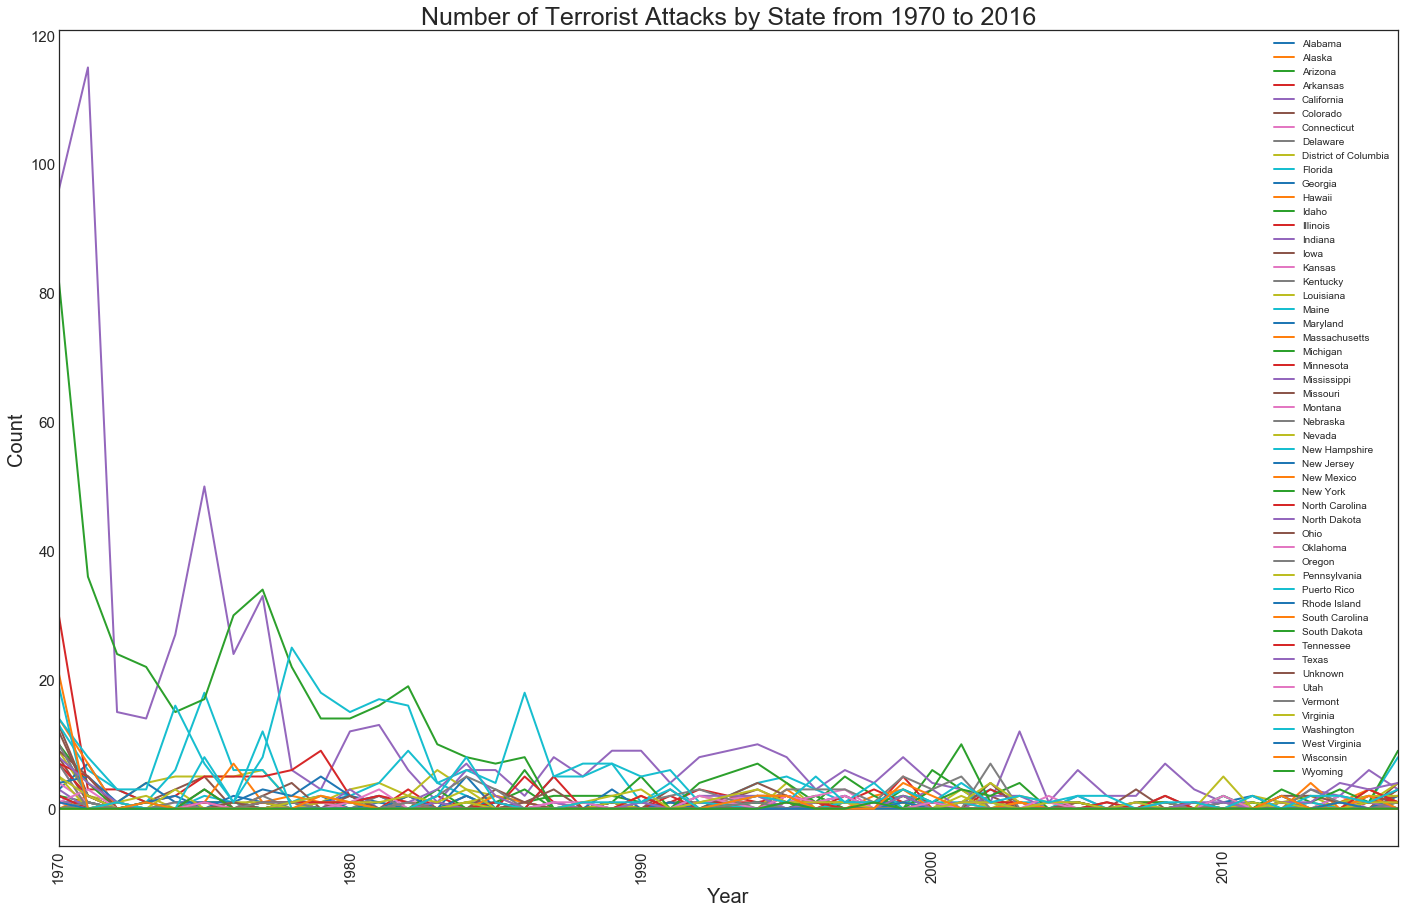

In [111]:
# Number of Terrorist Attackes by State from 1970 to 2016:
df_state.plot(figsize=(24, 15), lw=2)
plt.legend(fontsize=10)
plt.title('Number of Terrorist Attacks by State from 1970 to 2016', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

It seems that the number of attacks in the U.S. are going down since the 1970s and 1980s.  

----
The graph above is a bit hard to see, so I want to decrease the amount of information presented in a graph to the top 10 states & territories that have the most number of attacks:

In [112]:
# Reshape the data to sum number of attacks from 1970 to 2016:
US_top10 = df_state.sum()
US_top10 = pd.DataFrame(US_top10)
US_top10.index.name = 'state'
US_top10.columns = ['attack_counts']
US_top10.head()

,attack_counts
state,
Alabama,15
Alaska,1
Arizona,31
Arkansas,5
California,568


In [113]:
# Reshape the data to find top 10 States and Territories with the Highest Number of Attacks from 1970 to 2016:
US_top10 = US_top10.sort_values(by=['attack_counts'], ascending=False).head(10)
US_top10

,attack_counts
state,
California,568
New York,443
Puerto Rico,220
Florida,143
Illinois,102
Washington,96
District of Columbia,79
Oregon,63
Massachusetts,56


In [114]:
US_top10.index

Index(['California', 'New York', 'Puerto Rico', 'Florida', 'Illinois',
       'Washington', 'District of Columbia', 'Oregon', 'Massachusetts',
       'Texas'],
      dtype='object', name='state')

In [115]:
# Subset the data frame df_state with the top 10 states and terroteries:
US_top10 = df_state[['California', 'New York', 'Puerto Rico', 'Florida', 'Illinois',
       'Washington', 'District of Columbia', 'Oregon', 'Massachusetts',
       'Texas']]
US_top10.head()

state,California,New York,Puerto Rico,Florida,Illinois,Washington,District of Columbia,Oregon,Massachusetts,Texas
year,,,,,,,,,,
1970,96,82,14,13,30,19,9,10,14,8
1971,115,36,8,6,3,0,2,2,7,4
1972,15,24,3,3,3,1,1,0,0,1
1973,14,22,3,1,1,0,4,0,0,0
1974,27,15,16,6,2,0,5,1,0,0


Text(0,0.5,'Count')

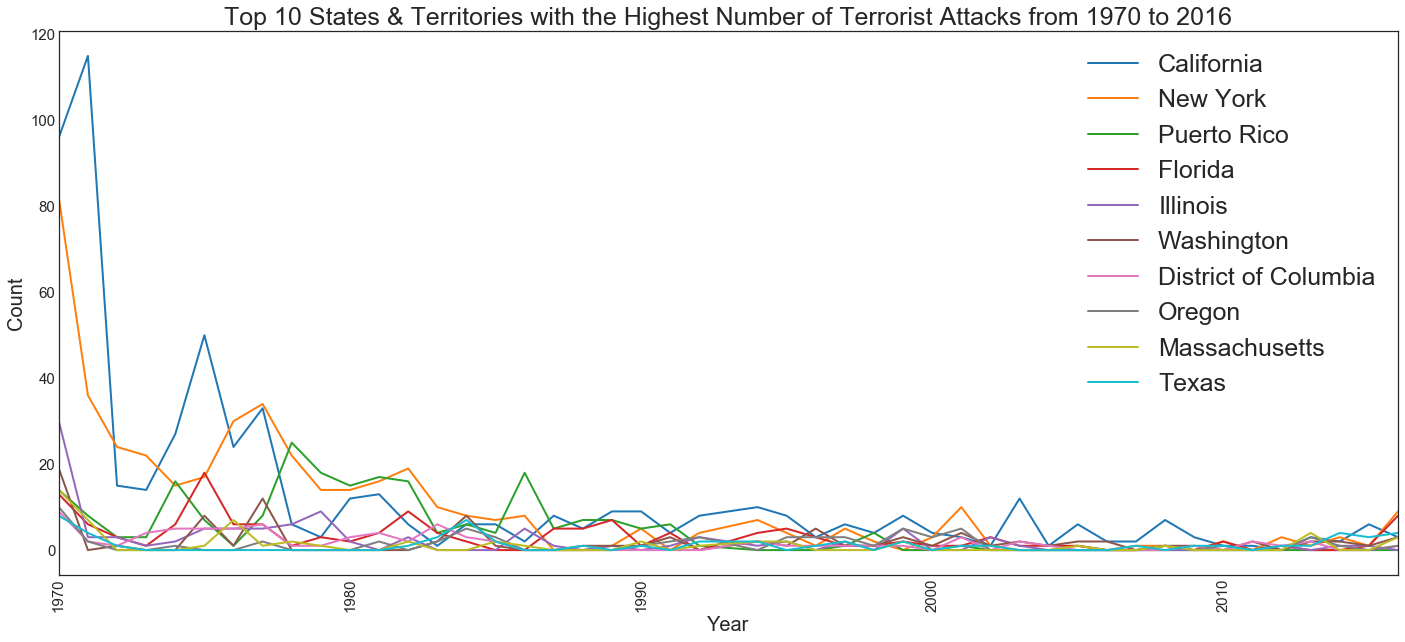

In [116]:
# Top 10 States and Territories with the Highest Number of Terrorist Attacks from 1970 to 2016:
# Legend in descending order:
US_top10.plot(figsize=(24, 10), lw=2)
plt.legend(fontsize=25)
plt.title('Top 10 States & Territories with the Highest Number of Terrorist Attacks from 1970 to 2016', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

This graph shows the top 10 states and territories that have the most number of attacks. The order of the legend is also in the descending order of the highest number of attacks.

----
# Analysis Using Machine Learning

GOAL: I want to use ML models to predict whether a terrorist attack will succeed or fail.

In [53]:
# Subset the df with all the columns I need for machine learning algorithms:
df_final = df_noout[['month', 'day', 'country_txt', 'attacktype_txt', 'targtype_txt', 'gang_name', 
                     'weaptype_txt', 'n_killed', 'n_wound', 'success']]

In [54]:
# df_final.head()

In [55]:
# Make dummy variables:
country = pd.get_dummies(df_final['country_txt'], drop_first=True)
attack = pd.get_dummies(df_final['attacktype_txt'], drop_first=True)
target = pd.get_dummies(df_final['targtype_txt'], drop_first=True)
gang = pd.get_dummies(df_final['gang_name'], drop_first=True)
weapon = pd.get_dummies(df_final['weaptype_txt'], drop_first=True)

In [56]:
df_final.drop(['country_txt','attacktype_txt','targtype_txt','gang_name','weaptype_txt'], axis=1, inplace=True)

/Users/langwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [57]:
df_final = pd.concat([df_final, country, attack, target, gang, weapon], axis=1)
df_final.head()

,month,day,n_killed,n_wound,success,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,...,Explosives/Bombs/Dynamite,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
0,7,2,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,12,18,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,18,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,18,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,18,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
## I commented out this cell becasue I have too many columns to run this cell. (too computationally expensive.)

## compute correlations for the columns of df_final:
# corr = df_final.corr()

## Set up the matplotlib figure:
# f, ax = plt.subplots(figsize=(11, 9))

## Generate a custom diverging colormap:
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# sns.heatmap(corr(), annot=True, cmap=cmap, xticklabels=corr.columns, yticklabels=corr.columns, cbar_kws={"shrink": .5})


----

In [58]:
# Features:

X = df_final.drop('success',axis=1)
X.head()

,month,day,n_killed,n_wound,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,Explosives/Bombs/Dynamite,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
0,7,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,12,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,18,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,18,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,18,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [59]:
# Target:

y = df_final['success']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: success, dtype: category
Categories (2, int64): [0, 1]

----

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict 
from sklearn.metrics import classification_report, confusion_matrix

### Method 1: Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
# make a pipeline:
pipe = make_pipeline(LogisticRegression(random_state=101)) 
pipe

Pipeline(memory=None,
     steps=[('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [153]:
# do a grid search on the best parameter C for the logistic regression model:
param_grid = dict(logisticregression__C=[0.1, 1, 10])
grid = GridSearchCV(pipe, param_grid=param_grid, refit=True, verbose=2)
grid.fit(X, y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] logisticregression__C=0.1 .......................................
[CV] ........................ logisticregression__C=0.1, total=  13.2s
[CV] logisticregression__C=0.1 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.4s remaining:    0.0s


[CV] ........................ logisticregression__C=0.1, total=  14.5s
[CV] logisticregression__C=0.1 .......................................
[CV] ........................ logisticregression__C=0.1, total=  14.7s
[CV] logisticregression__C=1 .........................................
[CV] .......................... logisticregression__C=1, total=  15.3s
[CV] logisticregression__C=1 .........................................
[CV] .......................... logisticregression__C=1, total=  14.7s
[CV] logisticregression__C=1 .........................................
[CV] .......................... logisticregression__C=1, total=  15.3s
[CV] logisticregression__C=10 ........................................
[CV] ......................... logisticregression__C=10, total=  16.1s
[CV] logisticregression__C=10 ........................................
[CV] ......................... logisticregression__C=10, total=  15.4s
[CV] logisticregression__C=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [156]:
grid.best_params_

{'logisticregression__C': 0.1}

In [63]:
# set pipe to the best parameter:
pipe.set_params(logisticregression__C=0.1) 

Pipeline(memory=None,
     steps=[('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [115]:
# do a CV (kfold=3) and compute average accuracy_score:
scores = cross_val_score(pipe, X, y, cv=3)
scores 

array([ 0.88769689,  0.90486751,  0.91432579])

In [117]:
# compute the mean score:
print("Accuracy Score is: %0.2f" % (scores.mean()))

Accuracy Score is: 0.90


In [64]:
# compute predicted y's (y_hat):
predicted = cross_val_predict(pipe, X, y, cv=3, n_jobs=-1)
predicted

array([1, 1, 1, ..., 1, 1, 1])

In [65]:
# classification table:
print(classification_report(y, predicted))

             precision    recall  f1-score   support

          0       0.61      0.21      0.31     16702
          1       0.91      0.98      0.95    141573

avg / total       0.88      0.90      0.88    158275



In [66]:
# confusion table:
print(confusion_matrix(y, predicted))

[[  3439  13263]
 [  2201 139372]]


----
### Method 2: Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
# make a pipeline:
pipe2 = make_pipeline(RandomForestClassifier(random_state=101)) 
pipe2

Pipeline(memory=None,
     steps=[('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False))])

In [155]:
# do a grid search on the best parameter n_estimators for the random forest model:
param_grid = dict(randomforestclassifier__n_estimators=[10, 20, 30])
grid2 = GridSearchCV(pipe2, param_grid=param_grid, refit=True, verbose=2)
grid2.fit(X, y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] randomforestclassifier__n_estimators=10 .........................
[CV] .......... randomforestclassifier__n_estimators=10, total=  28.4s
[CV] randomforestclassifier__n_estimators=10 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.2s remaining:    0.0s


[CV] .......... randomforestclassifier__n_estimators=10, total=  31.0s
[CV] randomforestclassifier__n_estimators=10 .........................
[CV] .......... randomforestclassifier__n_estimators=10, total=  30.8s
[CV] randomforestclassifier__n_estimators=20 .........................
[CV] .......... randomforestclassifier__n_estimators=20, total=  49.8s
[CV] randomforestclassifier__n_estimators=20 .........................
[CV] .......... randomforestclassifier__n_estimators=20, total=  55.3s
[CV] randomforestclassifier__n_estimators=20 .........................
[CV] .......... randomforestclassifier__n_estimators=20, total=  58.9s
[CV] randomforestclassifier__n_estimators=30 .........................
[CV] .......... randomforestclassifier__n_estimators=30, total= 1.2min
[CV] randomforestclassifier__n_estimators=30 .........................
[CV] .......... randomforestclassifier__n_estimators=30, total= 1.2min
[CV] randomforestclassifier__n_estimators=30 .........................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  8.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'randomforestclassifier__n_estimators': [10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [158]:
grid2.best_params_

{'randomforestclassifier__n_estimators': 30}

In [69]:
# set pipe2 to the best parameter:
pipe2.set_params(randomforestclassifier__n_estimators=30) 

Pipeline(memory=None,
     steps=[('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False))])

In [121]:
# do a CV (kfold=3) and compute average accuracy_score:
scores = cross_val_score(pipe2, X, y, cv=3)
scores 

array([ 0.89616937,  0.91328329,  0.89290724])

In [122]:
# compute the mean score:
print("Accuracy Score is: %0.2f" % (scores.mean()))

Accuracy Score is: 0.90


In [70]:
# compute predicted y's (y_hat):
predicted = cross_val_predict(pipe2, X, y, cv=3, n_jobs=-1)
predicted

array([1, 1, 1, ..., 1, 1, 1])

In [71]:
# classification table:
print(classification_report(y, predicted))

             precision    recall  f1-score   support

          0       0.54      0.40      0.46     16702
          1       0.93      0.96      0.95    141573

avg / total       0.89      0.90      0.89    158275



In [72]:
# confusion table:
print(confusion_matrix(y, predicted))

[[  6658  10044]
 [  5659 135914]]


----
### Method 3: Dimension-Reduction with PCA then SVM

In [73]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [74]:
# make a pipeline:
pipe3 = make_pipeline(StandardScaler(), PCA(n_components=10, random_state=101), SVC(random_state=101))  
pipe3

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=101,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=False))])

In [ ]:
# Too computationally expensive to do a grid search for this method on my PC,
# So I commented out this part of the code and did one single fitting instead.

# do a grid search on the best parameters for SVC:

# param_grid = dict(pca__n_components=[10, 20, 30], svc__C=[0.1, 1, 10])
# grid3 = GridSearchCV(pipe3, param_grid=param_grid, refit=True, verbose=2, n_jobs=-1) 
# Note: n_jobs=-1 specifies to use all the CPU cores the PC has. So it runs faster.

# grid3.fit(X, y)

In [ ]:
# grid3.best_params_

In [ ]:
# set pipe3 to the best parameters:

# pipe3.set_params(grid3.best_params_) 

In [75]:
# do a CV (kfold=3) and compute average accuracy_score:
scores = cross_val_score(pipe3, X, y, cv=3)
scores 

array([ 0.89395174,  0.89992039,  0.89108761])

In [76]:
# compute the mean score:
print("Accuracy Score is: %0.2f" % (scores.mean()))

Accuracy Score is: 0.89


In [75]:
# compute predicted y's (y_hat):
predicted = cross_val_predict(pipe3, X, y, cv=3, n_jobs=-1)
predicted

array([1, 1, 1, ..., 1, 1, 1])

In [76]:
# classification table:
print(classification_report(y, predicted))

             precision    recall  f1-score   support

          0       0.53      0.04      0.07     16702
          1       0.90      1.00      0.94    141573

avg / total       0.86      0.89      0.85    158275



In [77]:
# confusion table:
print(confusion_matrix(y, predicted))

[[   673  16029]
 [   592 140981]]


----
## Conclusions:

precision = True positive / (True positive + False positive) = True positive / Positive predictions

recall = True positive / (True positive + False negative) = True positive / Positive true state


In our case, we’re interested in the precision and recall rates for row “1”. (Row "0" is for failed terrorist attacks and row "1" is for 'successful' terrorist attacks.)

Precision for row “1”  tells us what proportion of terrorist attacks we predict would happen actually happened. In other words, proportion of TP in the set of predicted terrorist attacks. This is given by the rightmost column in the confusion matrix with TP in the bottom right cell.

Recall for row “1”  tells us what proportion of terrorist attacks that actually happened were predicted by us correctly. In other words, proportion of TP in the set of actual terrorist attacks. This is given by the bottom row in the confusion matrix with TP in the bottom right cell.

From the three models, model #2: random forest  did the best for precision and model #3: PCA then SVM did the best for recall.

----

In [ ]:
# Of course, I can do a lot more tweaking on my models.

# For instance, I can use RandomizedSearchCV to do 
# a more extensive (but computationally efficient) 
# grid search for the best parameters to fit the models. 
# I can also try stacking more transformers into the pipeline 
# to experiment with different combinations.

# Becasue of the time constraint on this project, I will
# end my model fitting here.